In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import glob
import sys, os
import datetime
import WetBulb

In [2]:
dirEra5 = '/home/edcoffel/drive/MAX-Filer/Research/Climate-02/Data-02-edcoffel-F20/ERA5'
years = [1981, 2021]

In [3]:
txx=xr.open_dataset('%s/era5_txx.nc'%dirEra5)


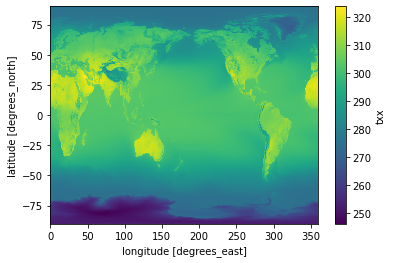

In [6]:
txx.txx.mean(dim='time').plot()

In [5]:
mx2t = xr.open_mfdataset('%s/daily/tasmax_*.nc'%(dirEra5), combine='by_coords')

In [6]:
txx = mx2t.resample(time='1Y').max()

In [7]:
txx = txx.rename({'mx2t':'txx'})

In [27]:
%%time
from dask.diagnostics import progress

with progress.ProgressBar():
    txx.to_netcdf('%s/era5_txx1.nc'%(dirEra5), encoding={'txx': {"dtype": "float32", "zlib": True, 'complevel':9}})

CPU times: user 13.6 s, sys: 540 ms, total: 14.1 s
Wall time: 14.2 s


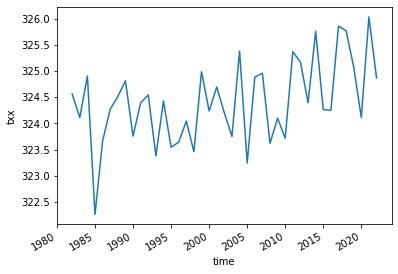

In [8]:
txx = xr.open_dataset('%s/era5_txx.nc'%(dirEra5))
txx.load()
txx.txx.max(dim=['latitude', 'longitude']).plot()

In [63]:
t = xr.open_dataset('%s/era5_tmean.nc'%dataDir)

In [64]:
t

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 41)
Coordinates:
  * time       (time) datetime64[ns] 1979-12-31 1980-12-31 ... 2019-12-31
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    tmean      (time, latitude, longitude) float32 ...

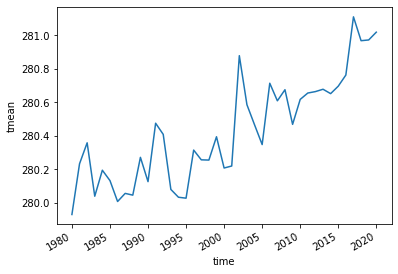

In [65]:
t.tmean.mean(dim=['latitude', 'longitude']).plot()